### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
data_path = "data/Retail_Sales_Data.csv"
df = pd.read_csv(data_path)
df.head()

retailer  store_id  week                   product  \
0  retail1         1     1       MintyFresh Mint 18g   
1  retail1         1     1    ChocoDelight Dark 200g   
2  retail1         1     1   ChocoDelight White 350g   
3  retail1         1     1  NuttyCream Hazelnuts 80g   
4  retail1         1     1        DarkDream Dark 60g   

                                         description  regular_price  \
0                    MintyFresh refresh mint 18grams      10.308645   
1                           200g ChocoDelight smooth       7.947956   
2                        350g ChocoDelight delicious      13.439368   
3                delightful Hazelnuts 80g NuttyCream       5.112777   
4  A decadent DarkDream dark chocolate ice cream ...      14.085425   

   competition_1_regular_price  competition_2_regular_price  \
0                    10.624815                    10.013451   
1                     7.748726                     7.589198   
2                    13.751508                    13.183621   
3                     5.279713                     5.222118   
4                    14.153721                    13.860002   

   competition_3_regular_price  competition_4_regular_price  ...  \
0                    10.378847                     9.910385  ...   
1                     8.085262                     7.602363  ...   
2                    13.875440                    12.982707  ...   
3                     5.117789                     4.877549  ...   
4                    14.339698                    14.365517  ...   

   competition_4_promo_price  competition_5_promo_price  \
0                   8.500521                   7.139537   
1                   5.766135                   4.267236   
2                   8.195118                   8.214548   
3                        NaN                        NaN   
4                        NaN                        NaN   

   competition_6_promo_price  competition_7_promo_price  \
0                   7.606831                   8.339536   
1                   5.912718                   5.156558   
2                   8.995387                  10.266603   
3                        NaN                        NaN   
4                        NaN                        NaN   

   competition_8_promo_price  competition_9_promo_price  \
0                   7.184384                   5.759620   
1                   6.976287                   5.884786   
2                  10.940801                   8.727031   
3                        NaN                        NaN   
4                        NaN                        NaN   

   competition_10_promo_price      value    volume   quantity  
0                    7.376553  85.368310  3.953882   9.707949  
1                    5.335849  82.924731  2.991418  14.922586  
2                    7.915147  52.527762  6.513600  12.889607  
3                         NaN  48.373782  5.489587  14.374834  
4                         NaN  47.718252  9.152050   9.193818  

[5 rows x 30 columns]

There are a mix of numeric and categorical data, although most of it is numeric.

In [3]:
df.shape

(8840, 30)

There are 30 columns and 8840 rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   retailer                      8840 non-null   object 
 1   store_id                      8840 non-null   int64  
 2   week                          8840 non-null   int64  
 3   product                       8840 non-null   object 
 4   description                   8840 non-null   object 
 5   regular_price                 8840 non-null   float64
 6   competition_1_regular_price   8840 non-null   float64
 7   competition_2_regular_price   8840 non-null   float64
 8   competition_3_regular_price   8840 non-null   float64
 9   competition_4_regular_price   8840 non-null   float64
 10  competition_5_regular_price   8840 non-null   float64
 11  competition_6_regular_price   8840 non-null   float64
 12  competition_7_regular_price   8840 non-null   float64
 13  com

The columns: retailer, product & description are strings.<br>
The rest of the columns are numeric (int and float).

In [5]:
df.describe()

store_id         week  regular_price  competition_1_regular_price  \
count  8840.000000  8840.000000    8840.000000                  8840.000000   
mean      4.882353    52.500000      12.502475                    12.500515   
std       2.654389    30.022524       4.293504                     4.306341   
min       1.000000     1.000000       5.001985                     4.765173   
25%       3.000000    26.750000       8.799638                     8.803668   
50%       5.000000    52.500000      12.467097                    12.454414   
75%       7.000000    78.250000      16.191315                    16.144408   
max      10.000000   104.000000      19.998458                    20.900031   

       competition_2_regular_price  competition_3_regular_price  \
count                  8840.000000                  8840.000000   
mean                     12.508141                    12.508738   
std                       4.315353                     4.317088   
min                       4.755664                     4.802469   
25%                       8.795660                     8.786544   
50%                      12.478630                    12.457477   
75%                      16.178715                    16.165813   
max                      20.937905                    20.948244   

       competition_4_regular_price  competition_5_regular_price  \
count                  8840.000000                  8840.000000   
mean                     12.500413                    12.506552   
std                       4.306684                     4.306550   
min                       4.796918                     4.786102   
25%                       8.814887                     8.811599   
50%                      12.476335                    12.523324   
75%                      16.156216                    16.144508   
max                      20.837663                    20.878825   

       competition_6_regular_price  competition_7_regular_price  ...  \
count                  8840.000000                  8840.000000  ...   
mean                     12.500806                    12.505940  ...   
std                       4.304356                     4.308193  ...   
min                       4.765377                     4.770900  ...   
25%                       8.807260                     8.798814  ...   
50%                      12.494203                    12.493345  ...   
75%                      16.173968                    16.167325  ...   
max                      20.867790                    20.955772  ...   

       competition_4_promo_price  competition_5_promo_price  \
count                 646.000000                 646.000000   
mean                    8.856125                   8.680924   
std                     3.447950                   3.254183   
min                     2.599833                   2.558680   
25%                     6.122362                   6.103242   
50%                     8.666631                   8.535861   
75%                    11.169786                  10.942230   
max                    18.299611                  17.242075   

       competition_6_promo_price  competition_7_promo_price  \
count                 646.000000                 646.000000   
mean                    8.953399                   8.972906   
std                     3.493585                   3.443357   
min                     2.721779                   2.565868   
25%                     6.155878                   6.329006   
50%                     8.947000                   8.915623   
75%                    11.364736                  11.496758   
max                    17.838873                  18.292025   

       competition_8_promo_price  competition_9_promo_price  \
count                 646.000000                 646.000000   
mean                    8.839268                   8.885959   
std                     3.483442                   3.404359   
min                     2.594851                   2.

Summary Statistics:<br>


In [6]:
df.isna().sum()

retailer                           0
store_id                           0
week                               0
product                            0
description                        0
regular_price                      0
competition_1_regular_price        0
competition_2_regular_price        0
competition_3_regular_price        0
competition_4_regular_price        0
competition_5_regular_price        0
competition_6_regular_price        0
competition_7_regular_price        0
competition_8_regular_price        0
competition_9_regular_price        0
competition_10_regular_price       0
promo_price                     8194
competition_1_promo_price       8194
competition_2_promo_price       8194
competition_3_promo_price       8194
competition_4_promo_price       8194
competition_5_promo_price       8194
competition_6_promo_price       8194
competition_7_promo_price       8194
competition_8_promo_price       8194
competition_9_promo_price       8194
competition_10_promo_price      8194
v

The data related to promo prices have several missing values.

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

retailer                           2
store_id                          10
week                             104
product                            5
description                       20
regular_price                   8840
competition_1_regular_price     8840
competition_2_regular_price     8840
competition_3_regular_price     8840
competition_4_regular_price     8840
competition_5_regular_price     8840
competition_6_regular_price     8840
competition_7_regular_price     8840
competition_8_regular_price     8840
competition_9_regular_price     8840
competition_10_regular_price    8840
promo_price                      646
competition_1_promo_price        646
competition_2_promo_price        646
competition_3_promo_price        646
competition_4_promo_price        646
competition_5_promo_price        646
competition_6_promo_price        646
competition_7_promo_price        646
competition_8_promo_price        646
competition_9_promo_price        646
competition_10_promo_price       646
v

In [9]:
# Frequency of occurence of each value in 'retailer' column
df.retailer.value_counts()

retail1    5200
retail2    3640
Name: retailer, dtype: int64

In [10]:
# Frequency of occurence of each value in 'store_id' column
df.store_id.value_counts()

1     1040
2     1040
3     1040
4     1040
5     1040
6     1040
7     1040
8      520
9      520
10     520
Name: store_id, dtype: int64

In [11]:
# Frequency of occurence of each value in 'product' column
df['product'].value_counts()

MintyFresh Mint 18g         1768
ChocoDelight Dark 200g      1768
ChocoDelight White 350g     1768
NuttyCream Hazelnuts 80g    1768
DarkDream Dark 60g          1768
Name: product, dtype: int64

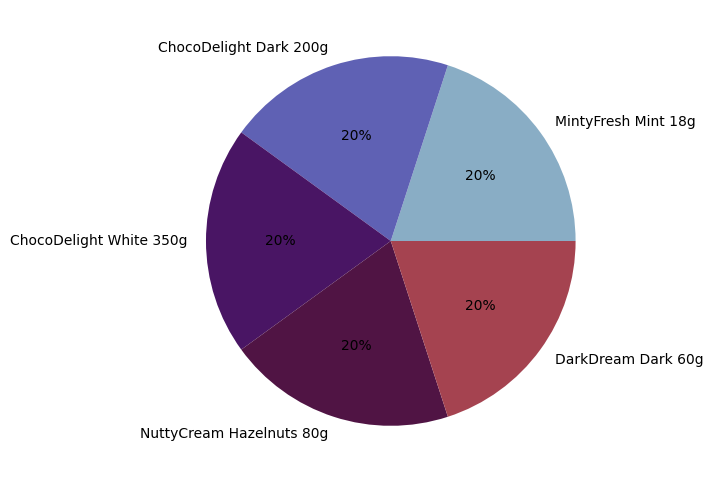

In [12]:
# Visualising the product in a pie-chart

plt.figure(figsize=(6, 6))
palette_color = sns.color_palette('twilight')
  
plt.pie(df['product'].value_counts(), labels=df['product'].value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

In [13]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

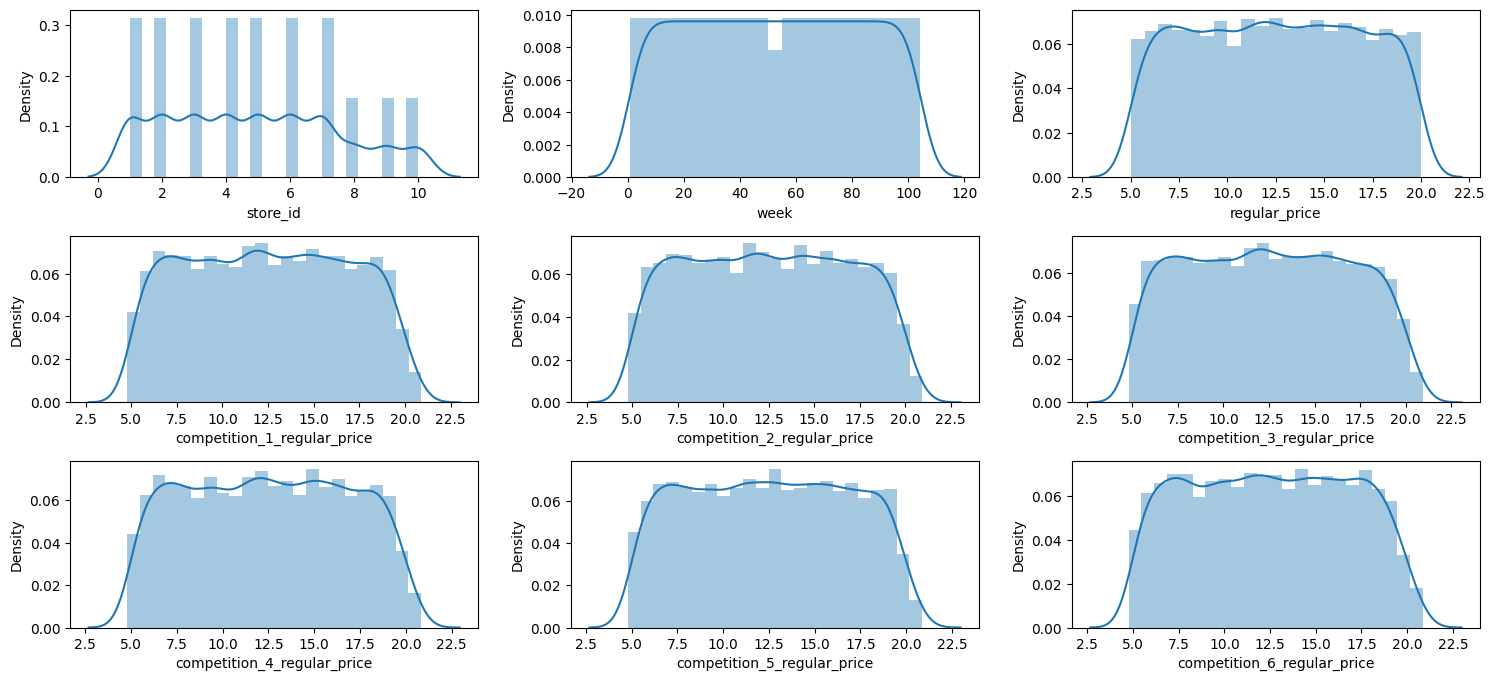

In [14]:
# Data distribution for numerical columns
plt.figure(figsize=(15, 20))
plot_num = 1
for col in numerical_cols:
    if plot_num <= 9:
        ax = plt.subplot(9, 3, plot_num)
        sns.distplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

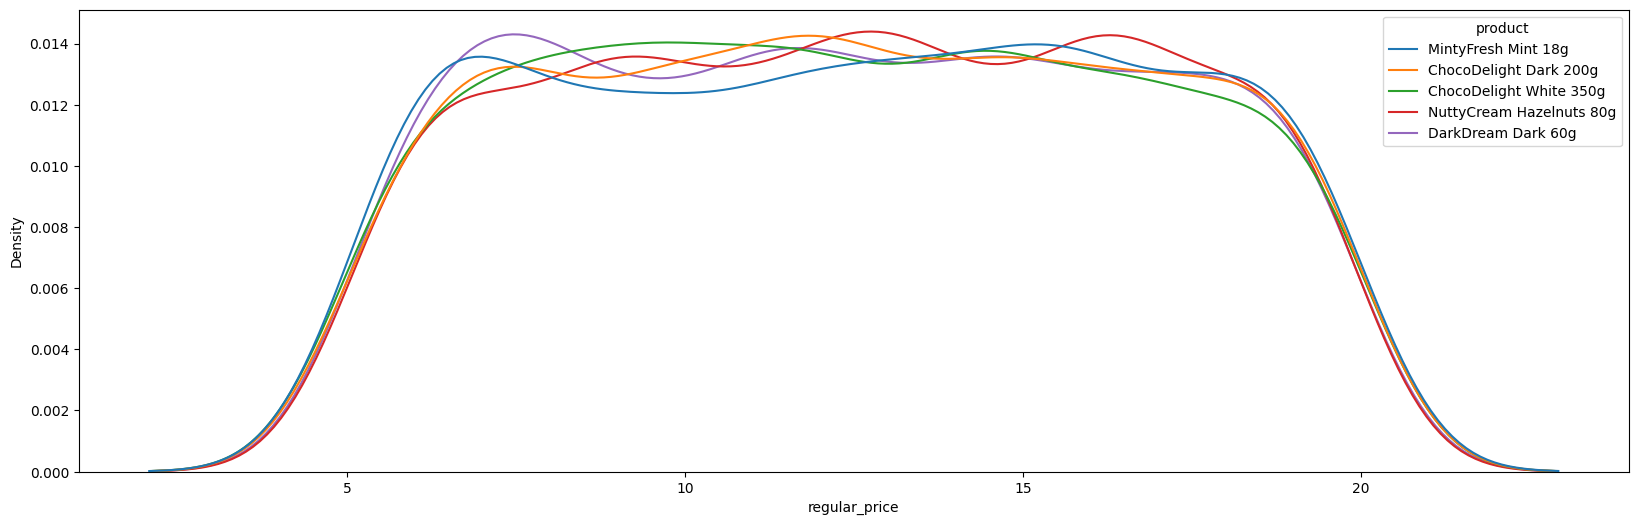

In [15]:
# regular_price vs product
plt.figure(figsize=(20, 6))
sns.kdeplot(x="regular_price", data=df, hue="product")
plt.show()

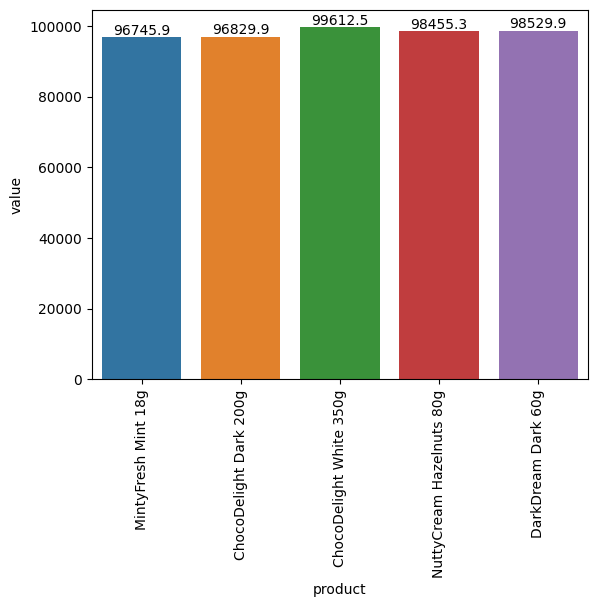

In [16]:
# value vs product
ax = sns.barplot(x = "product", y = "value", data = df, estimator='sum', errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

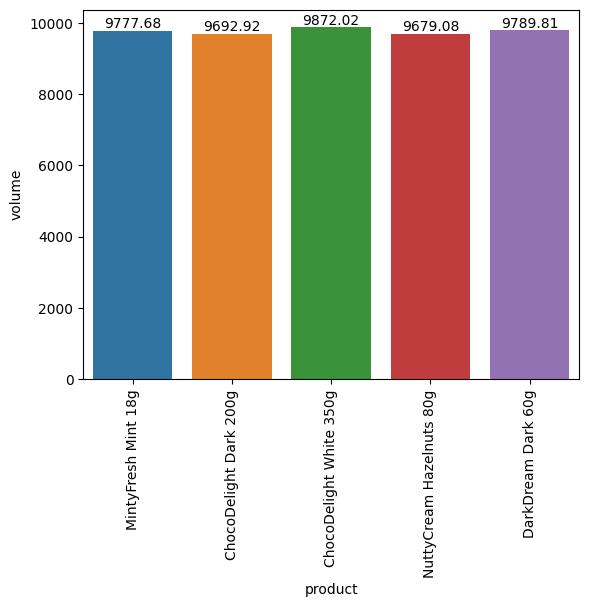

In [17]:
# volume vs product
ax = sns.barplot(x = "product", y = "volume", data = df, estimator='sum', errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

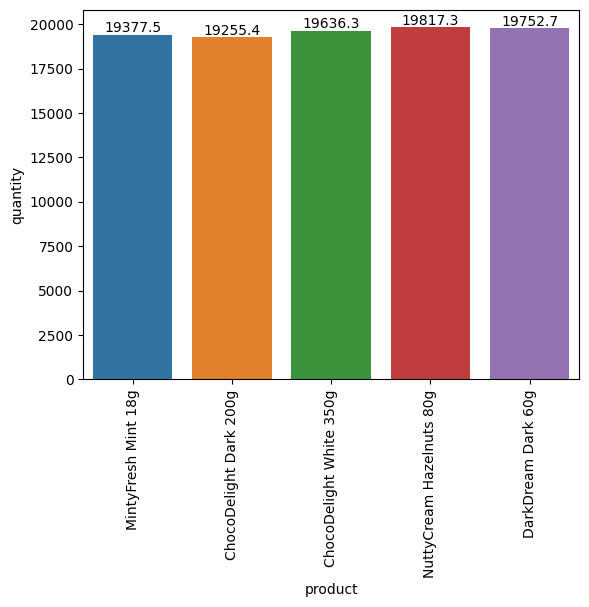

In [18]:
# quantity vs product
ax = sns.barplot(x = "product", y = "quantity", data = df, estimator='sum', errorbar=None,)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [19]:
df_wo_promo = df.drop([f'competition_{i}_promo_price' for i in range(1, 11)], axis=1)
df_wo_promo.drop('promo_price', axis=1, inplace=True)
df_wo_promo.columns

Index(['retailer', 'store_id', 'week', 'product', 'description',
       'regular_price', 'competition_1_regular_price',
       'competition_2_regular_price', 'competition_3_regular_price',
       'competition_4_regular_price', 'competition_5_regular_price',
       'competition_6_regular_price', 'competition_7_regular_price',
       'competition_8_regular_price', 'competition_9_regular_price',
       'competition_10_regular_price', 'value', 'volume', 'quantity'],
      dtype='object')

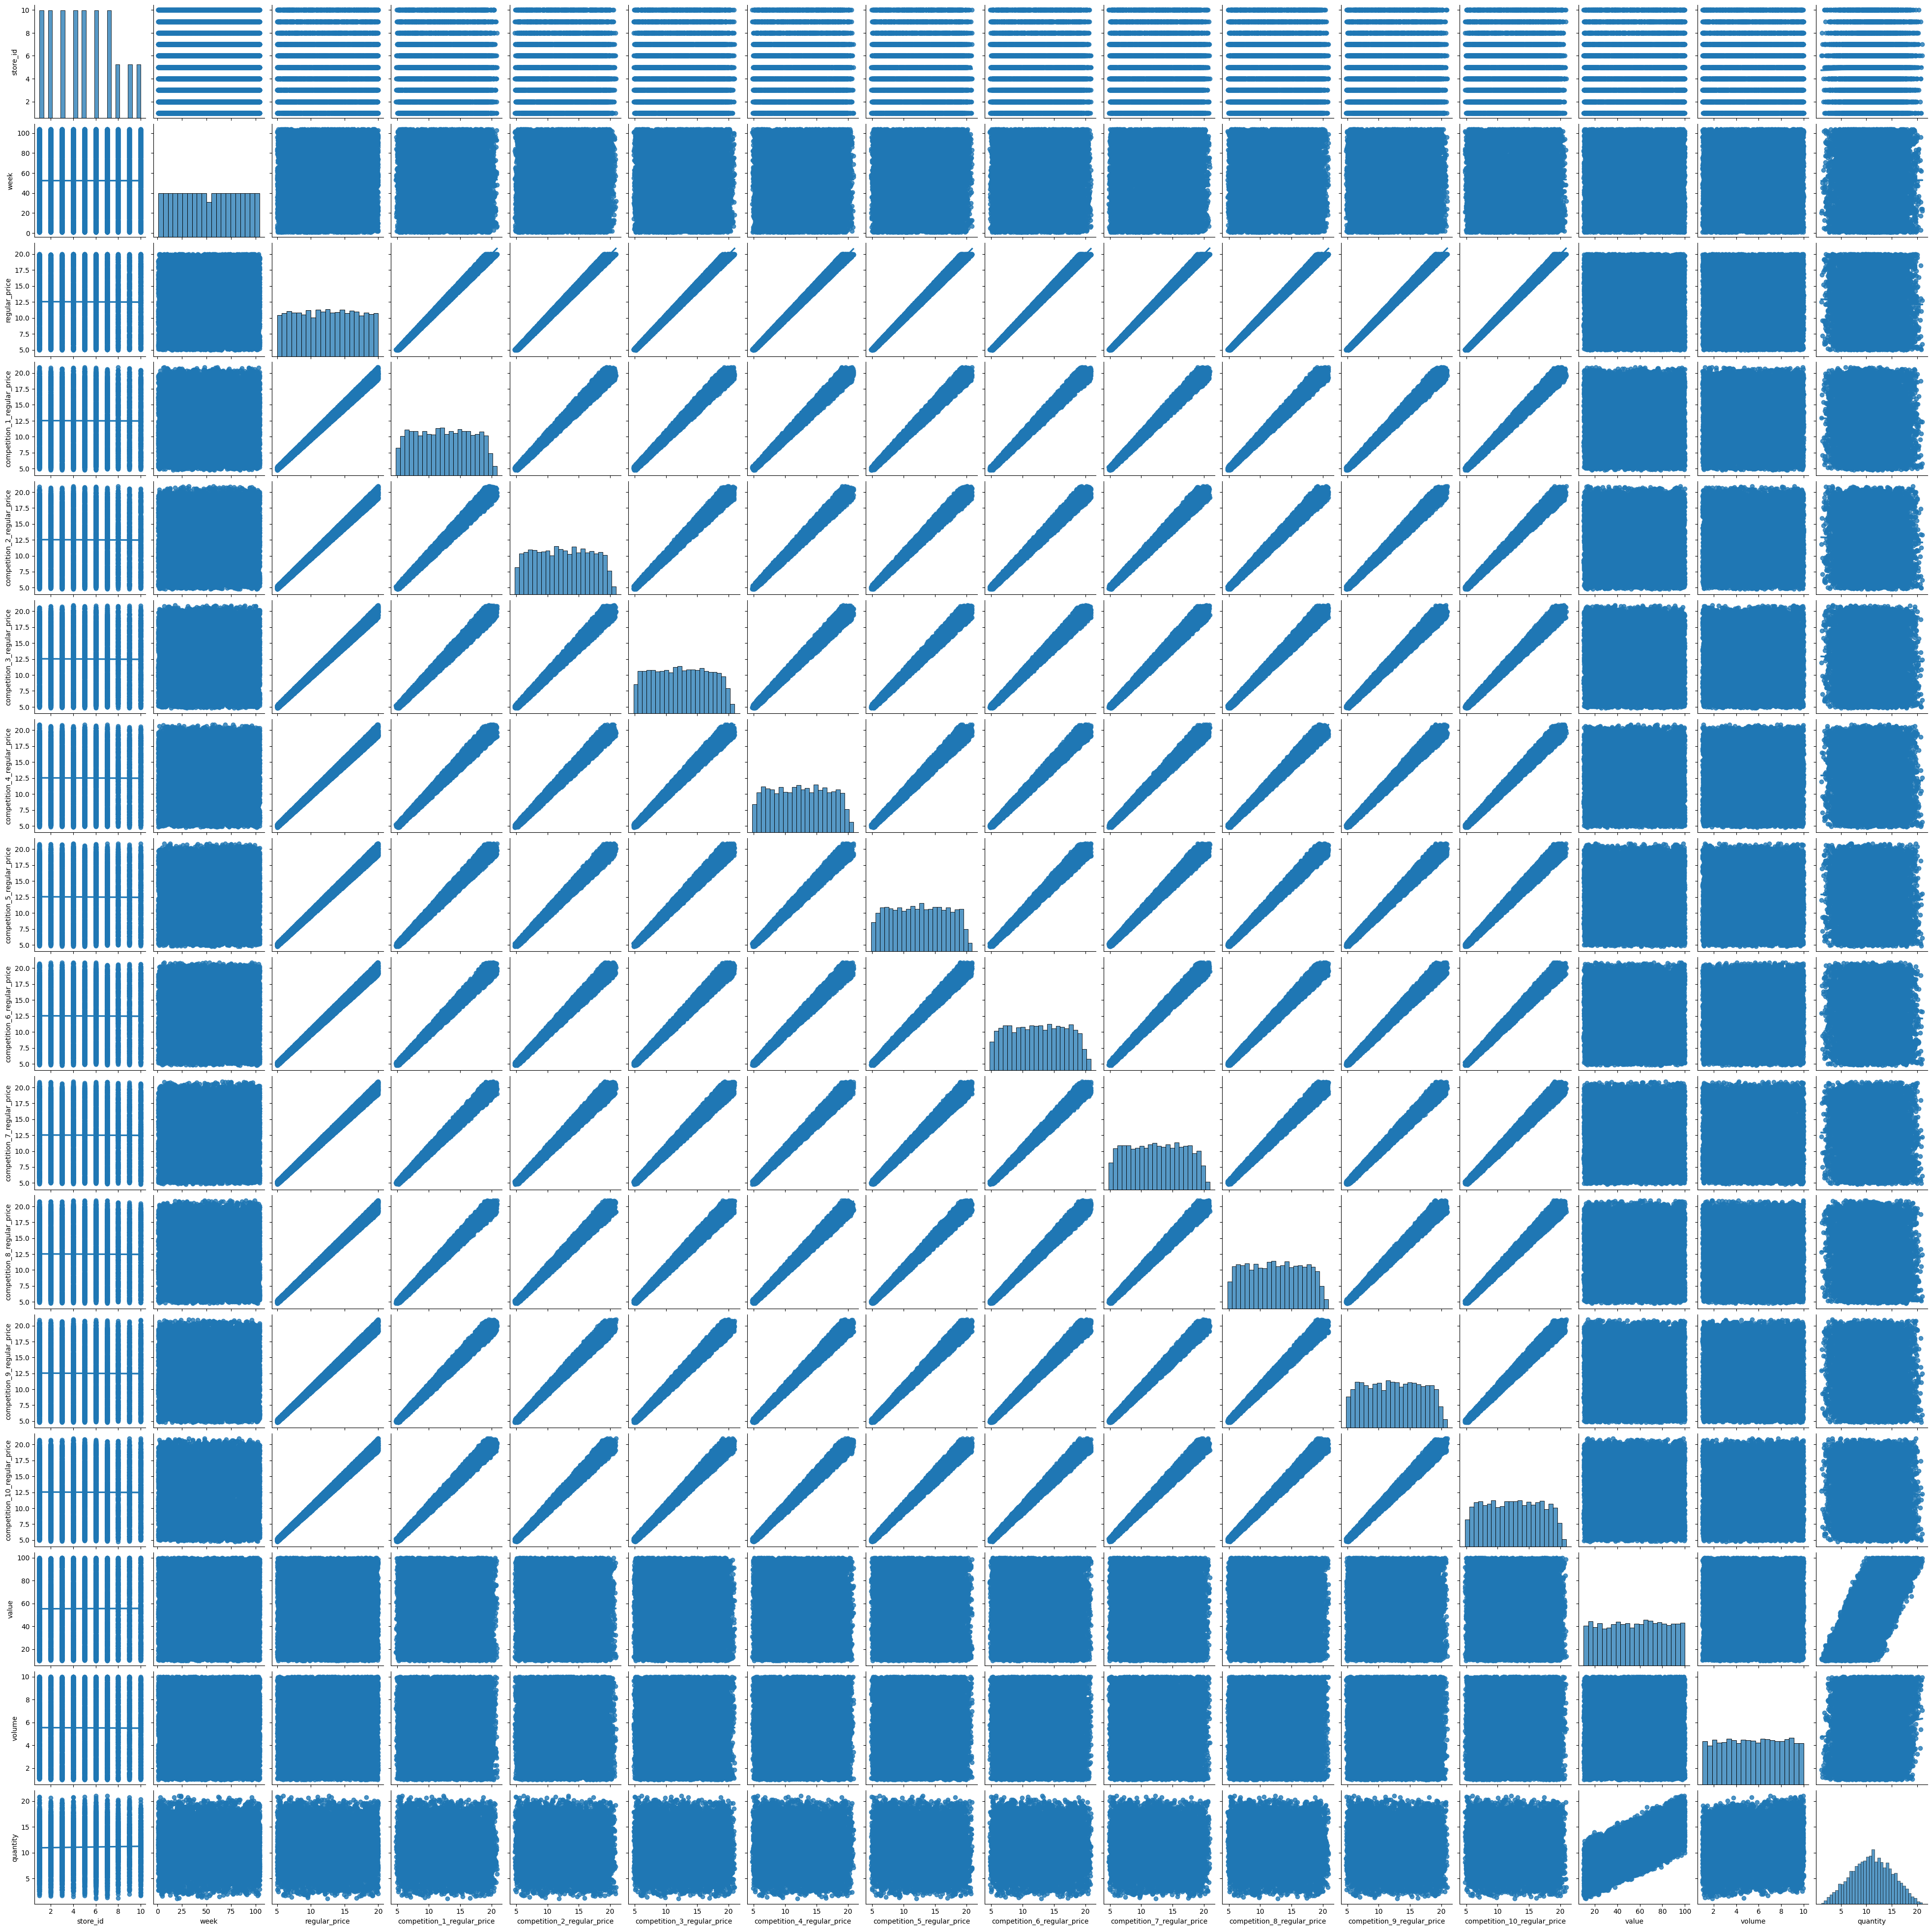

In [20]:
sns.pairplot(df_wo_promo, kind='reg')
plt.show()

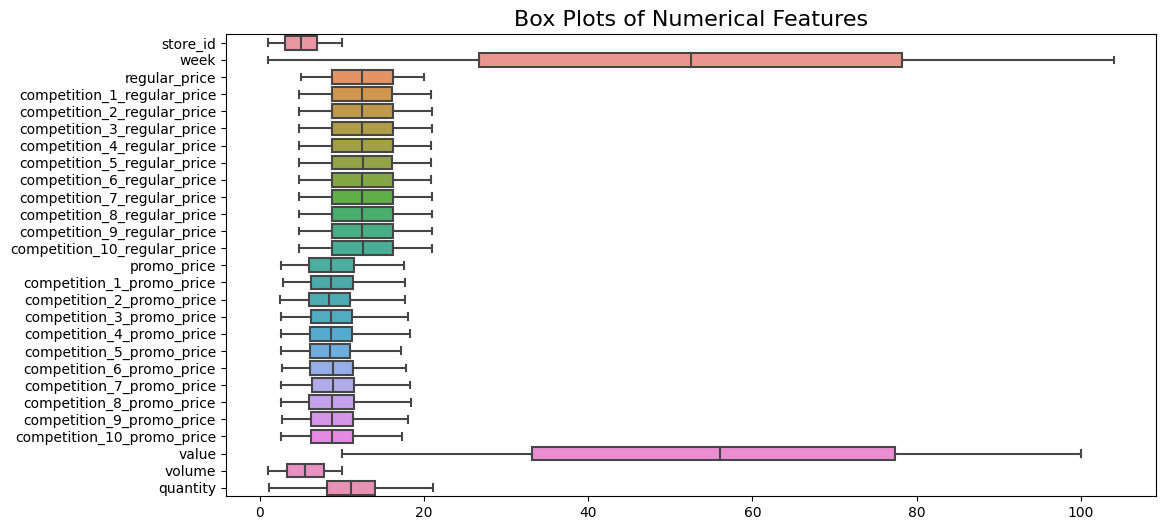

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], orient='h')
plt.title('Box Plots of Numerical Features', fontsize=16)
plt.show()

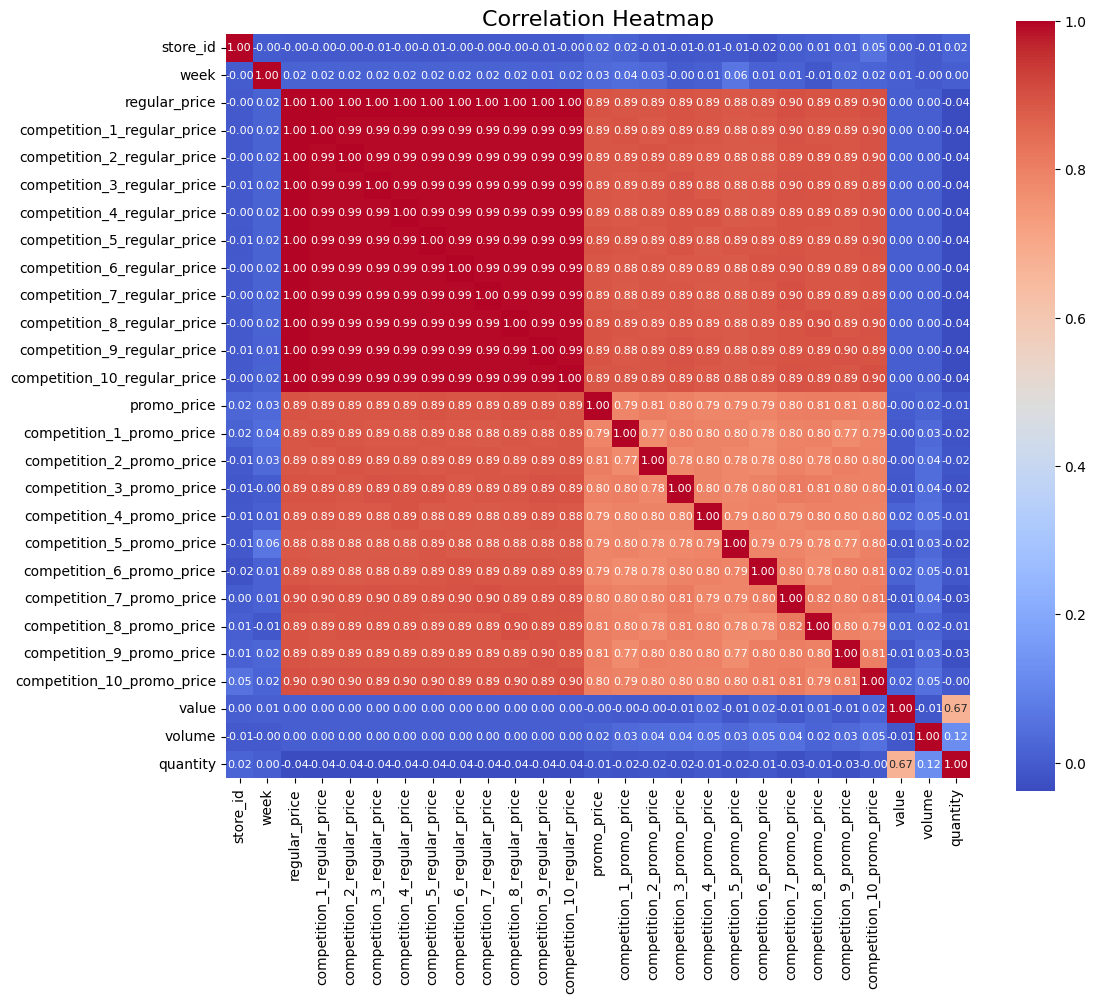

In [22]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, annot_kws={"size": 8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [23]:
grouped_df = df.groupby('product')[['value', 'volume', 'quantity']].mean().reset_index()
print("\nGrouped Data by Product:")
print(grouped_df)


Grouped Data by Product:
                    product      value    volume   quantity
0    ChocoDelight Dark 200g  54.768027  5.482422  10.891070
1   ChocoDelight White 350g  56.341939  5.583724  11.106480
2        DarkDream Dark 60g  55.729578  5.537226  11.172350
3       MintyFresh Mint 18g  54.720544  5.530360  10.960121
4  NuttyCream Hazelnuts 80g  55.687385  5.474594  11.208901


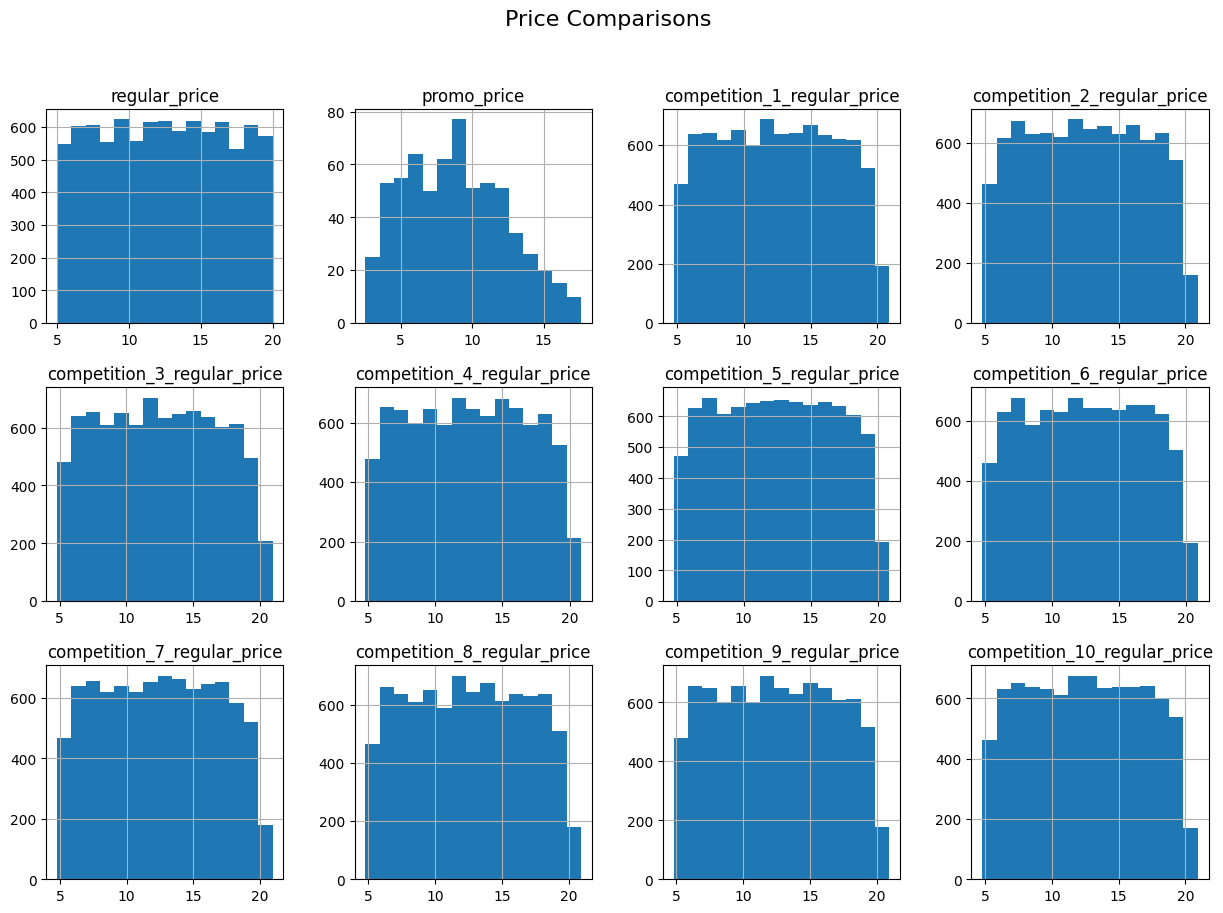

In [24]:
price_cols = ['regular_price', 'promo_price'] + [f'competition_{i}_regular_price' for i in range(1, 11)]
df[price_cols].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Price Comparisons', fontsize=16)
plt.show()

In [25]:
correlation_matrix = df[['regular_price', 'promo_price', 'quantity'] + \
                        [f'competition_{i}_regular_price' for i in range(1, 11)]].corr()

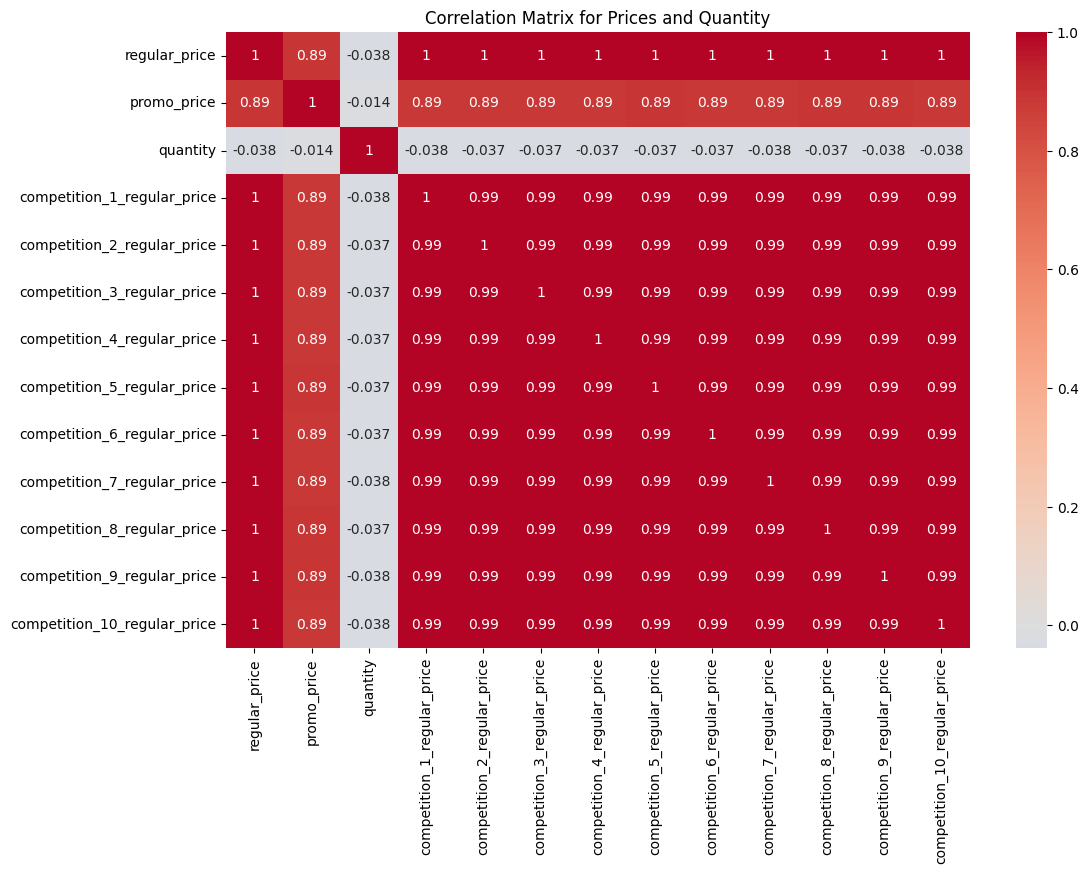

In [26]:
# Visualizing correlations (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix for Prices and Quantity")
plt.show()

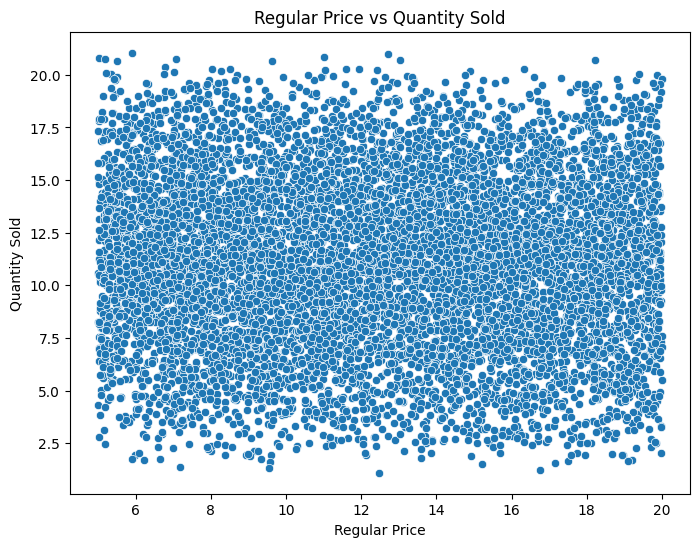

In [27]:
# Regular Price vs Quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='regular_price', y='quantity', data=df)
plt.title('Regular Price vs Quantity Sold')
plt.xlabel('Regular Price')
plt.ylabel('Quantity Sold')
plt.show()

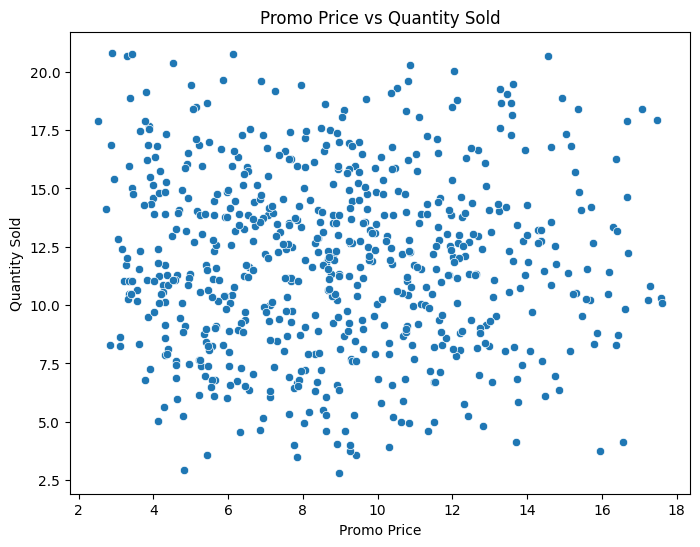

In [28]:
# Promo Price vs Quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='promo_price', y='quantity', data=df)
plt.title('Promo Price vs Quantity Sold')
plt.xlabel('Promo Price')
plt.ylabel('Quantity Sold')
plt.show()

In [29]:
competitor_regular_prices = [f'competition_{i}_regular_price' for i in range(1, 11)]
df['average_competitor_price'] = df[competitor_regular_prices].mean(axis=1)
df['price_difference'] = df['regular_price'] - df['average_competitor_price']

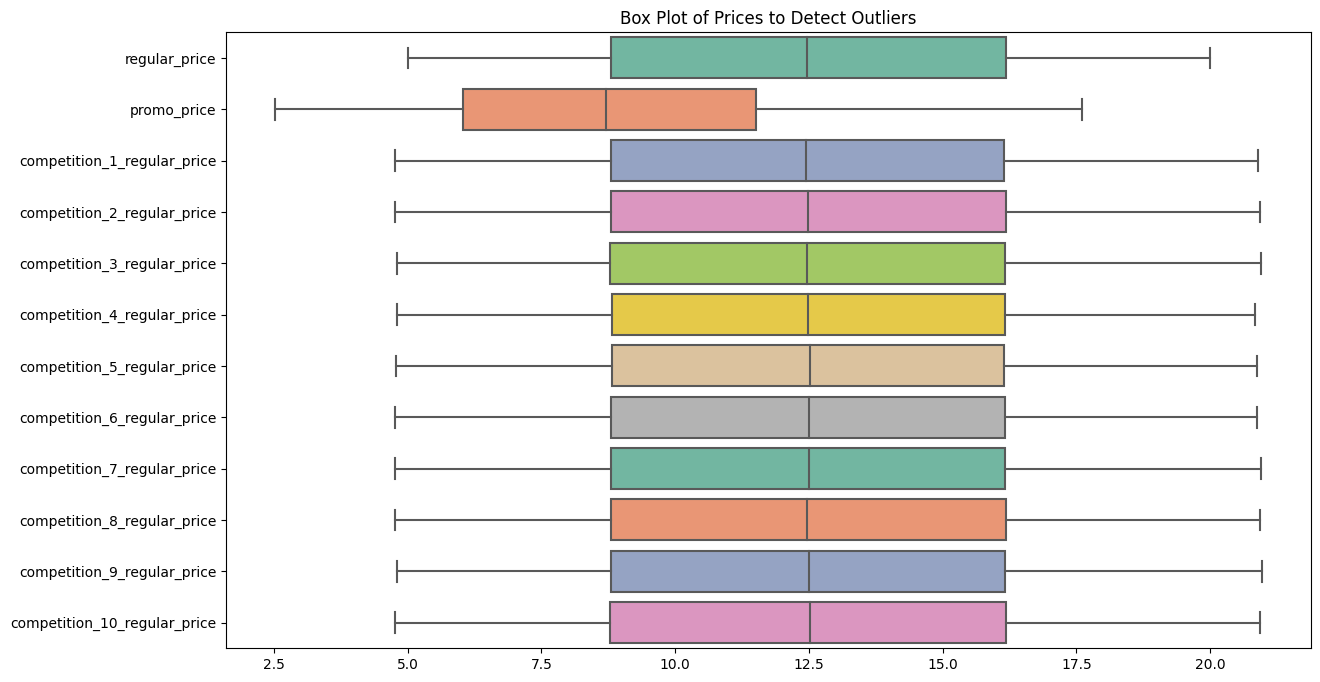

In [30]:
price_columns = ['regular_price', 'promo_price'] + [f'competition_{i}_regular_price' for i in range(1, 11)]

# Step 1: Box Plot Analysis
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[price_columns], orient="h", palette="Set2")
plt.title("Box Plot of Prices to Detect Outliers")
plt.show()

In [31]:
price_zscores = df[price_columns].apply(zscore)
outliers_zscore = (price_zscores.abs() > 3).any(axis=1)
df_zscore_outliers = df[outliers_zscore]

df_zscore_outliers

Empty DataFrame
Columns: [retailer, store_id, week, product, description, regular_price, competition_1_regular_price, competition_2_regular_price, competition_3_regular_price, competition_4_regular_price, competition_5_regular_price, competition_6_regular_price, competition_7_regular_price, competition_8_regular_price, competition_9_regular_price, competition_10_regular_price, promo_price, competition_1_promo_price, competition_2_promo_price, competition_3_promo_price, competition_4_promo_price, competition_5_promo_price, competition_6_promo_price, competition_7_promo_price, competition_8_promo_price, competition_9_promo_price, competition_10_promo_price, value, volume, quantity, average_competitor_price, price_difference]
Index: []

[0 rows x 32 columns]

In [32]:
competitor_regular_prices = [f'competition_{i}_regular_price' for i in range(1, 11)]
df['average_competitor_price'] = df[competitor_regular_prices].mean(axis=1)
df['price_disparity'] = df['regular_price'] - df['average_competitor_price']

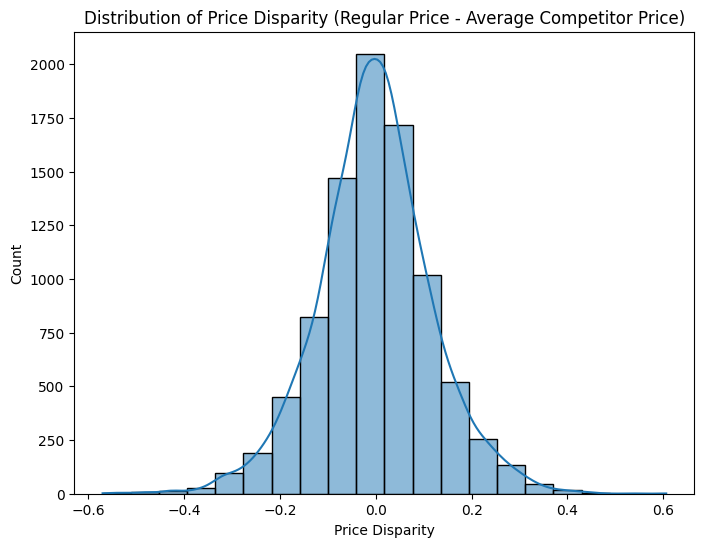

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price_disparity'], kde=True, bins=20)
plt.title("Distribution of Price Disparity (Regular Price - Average Competitor Price)")
plt.xlabel("Price Disparity")
plt.show()

In [34]:
# IQR Method for Outlier Detection in Price Disparity
Q1 = df['price_disparity'].quantile(0.25)
Q3 = df['price_disparity'].quantile(0.75)
IQR = Q3 - Q1
disparity_outliers = df[(df['price_disparity'] < (Q1 - 1.5 * IQR)) | (df['price_disparity'] > (Q3 + 1.5 * IQR))]

print("\nPrice Disparity Outliers Detected:")
print(disparity_outliers[['store_id', 'product', 'regular_price', 'average_competitor_price', 'price_disparity']])


Price Disparity Outliers Detected:
      store_id                  product  regular_price  \
41           1   ChocoDelight Dark 200g      17.797922   
67           1  ChocoDelight White 350g      11.804480   
157          1  ChocoDelight White 350g      18.381352   
184          1       DarkDream Dark 60g      16.969328   
235          1      MintyFresh Mint 18g      19.825362   
...        ...                      ...            ...   
8786         7   ChocoDelight Dark 200g      17.799274   
8812         7  ChocoDelight White 350g      16.254407   
8827         7  ChocoDelight White 350g      17.420265   
8834         7       DarkDream Dark 60g      19.345451   
8837         7  ChocoDelight White 350g      15.288729   

      average_competitor_price  price_disparity  
41                   18.111622        -0.313700  
67                   12.096199        -0.291719  
157                  18.097530         0.283823  
184                  17.345396        -0.376068  
235              

In [35]:
for column in price_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    column_outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    if not column_outliers.empty:
        print(f"\nOutliers in {column}:")
        print(column_outliers[['store_id', 'product', column]])

No outliers present within the the price columns.

In [36]:
df.skew()

store_id                        0.240058
week                            0.000000
regular_price                  -0.000772
competition_1_regular_price     0.014914
competition_2_regular_price     0.015669
competition_3_regular_price     0.021895
competition_4_regular_price     0.011006
competition_5_regular_price     0.010256
competition_6_regular_price     0.008788
competition_7_regular_price     0.013767
competition_8_regular_price     0.014040
competition_9_regular_price     0.012018
competition_10_regular_price    0.014684
promo_price                     0.309973
competition_1_promo_price       0.299882
competition_2_promo_price       0.337848
competition_3_promo_price       0.250514
competition_4_promo_price       0.272704
competition_5_promo_price       0.292448
competition_6_promo_price       0.258672
competition_7_promo_price       0.242892
competition_8_promo_price       0.217028
competition_9_promo_price       0.291659
competition_10_promo_price      0.197394
value           

No apparent skewness: Extremely normal distribution

### Analysis of sales

In [37]:
sales_metrics = ['volume', 'quantity', 'value']
df_sales = df[sales_metrics]
df_sales

volume   quantity      value
0     3.953882   9.707949  85.368310
1     2.991418  14.922586  82.924731
2     6.513600  12.889607  52.527762
3     5.489587  14.374834  48.373782
4     9.152050   9.193818  47.718252
...        ...        ...        ...
8835  4.517258  13.003315  30.434887
8836  1.722753   6.480086  57.522377
8837  9.068857   7.934285  36.009903
8838  2.267848  14.897673  75.254282
8839  4.755792  11.487812  63.267437

[8840 rows x 3 columns]

In [38]:
print("Descriptive Statistics for Sales Metrics:")
print(df_sales.describe())

Descriptive Statistics for Sales Metrics:
            volume     quantity        value
count  8840.000000  8840.000000  8840.000000
mean      5.521665    11.067785    55.449495
std       2.580647     3.948788    25.911704
min       1.000177     1.094179    10.011517
25%       3.306865     8.221081    33.167182
50%       5.521104    11.098918    56.069822
75%       7.752540    14.008293    77.350443
max       9.999793    21.049790    99.996789


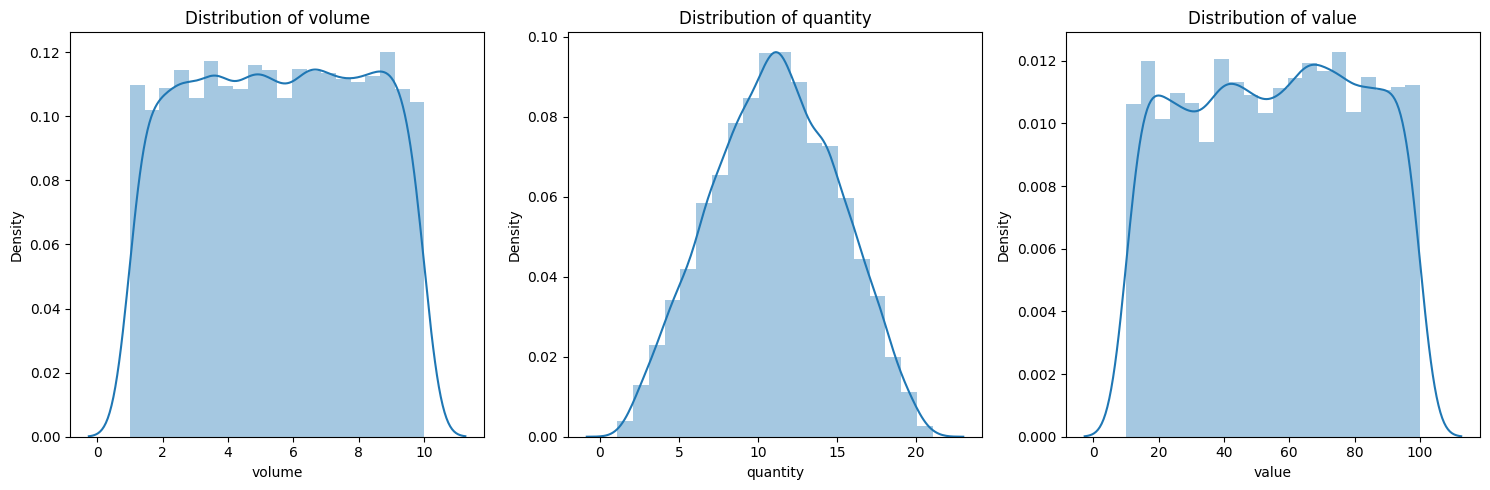

In [39]:
plt.figure(figsize=(15, 5))
for i, metric in enumerate(sales_metrics, 1):
    plt.subplot(1, 3, i)
    sns.distplot(df[metric], kde=True, bins=20)
    plt.title(f'Distribution of {metric}')
plt.tight_layout()
plt.show()

In [40]:
correlation = df[sales_metrics].corr()
print("\nCorrelation between Sales Metrics:")
print(correlation)


Correlation between Sales Metrics:
            volume  quantity     value
volume    1.000000  0.122525 -0.011375
quantity  0.122525  1.000000  0.671915
value    -0.011375  0.671915  1.000000


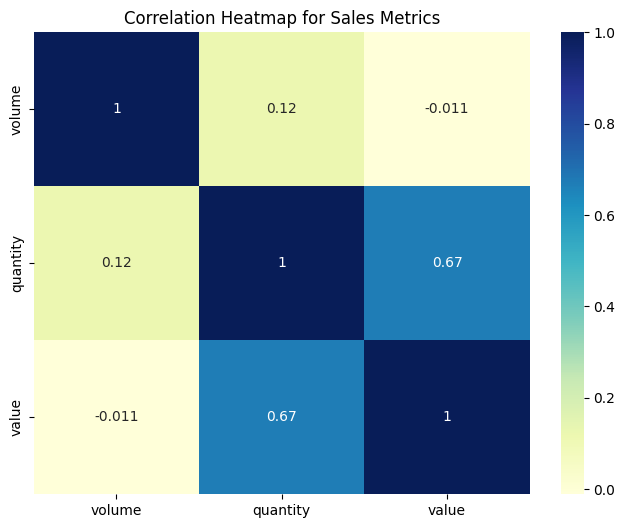

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap for Sales Metrics')
plt.show()

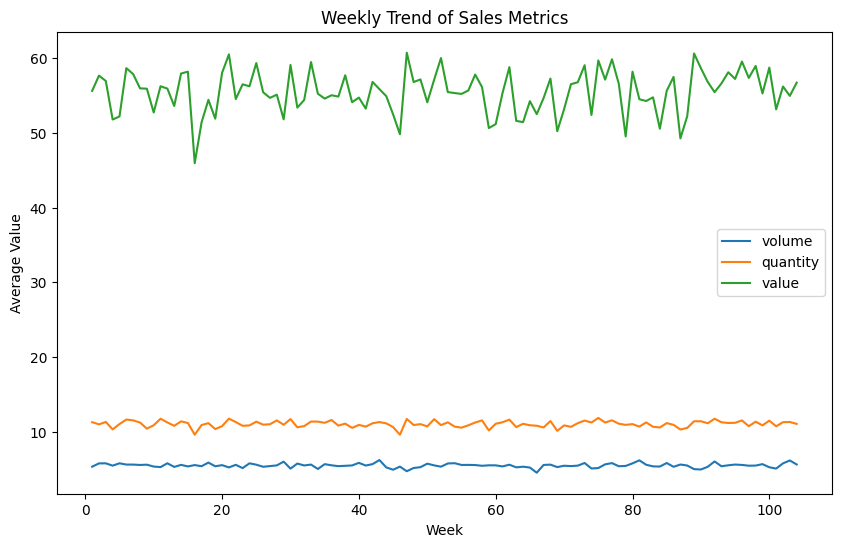

In [42]:
# Weekly trend
plt.figure(figsize=(10, 6))
for metric in sales_metrics:
    weekly_avg = df.groupby('week')[metric].mean()
    plt.plot(weekly_avg, label=metric)
plt.xlabel('Week')
plt.ylabel('Average Value')
plt.title('Weekly Trend of Sales Metrics')
plt.legend()
plt.show()

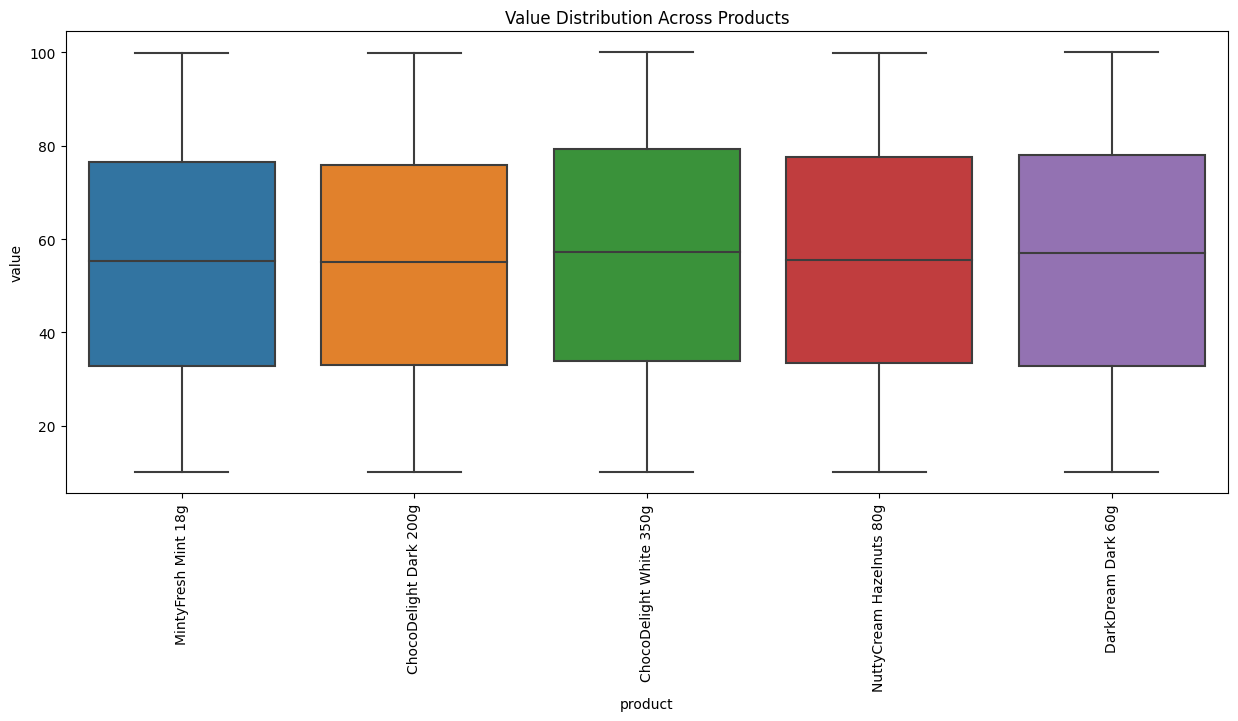

In [43]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='product', y='value')
plt.xticks(rotation=90)
plt.title('Value Distribution Across Products')
plt.show()

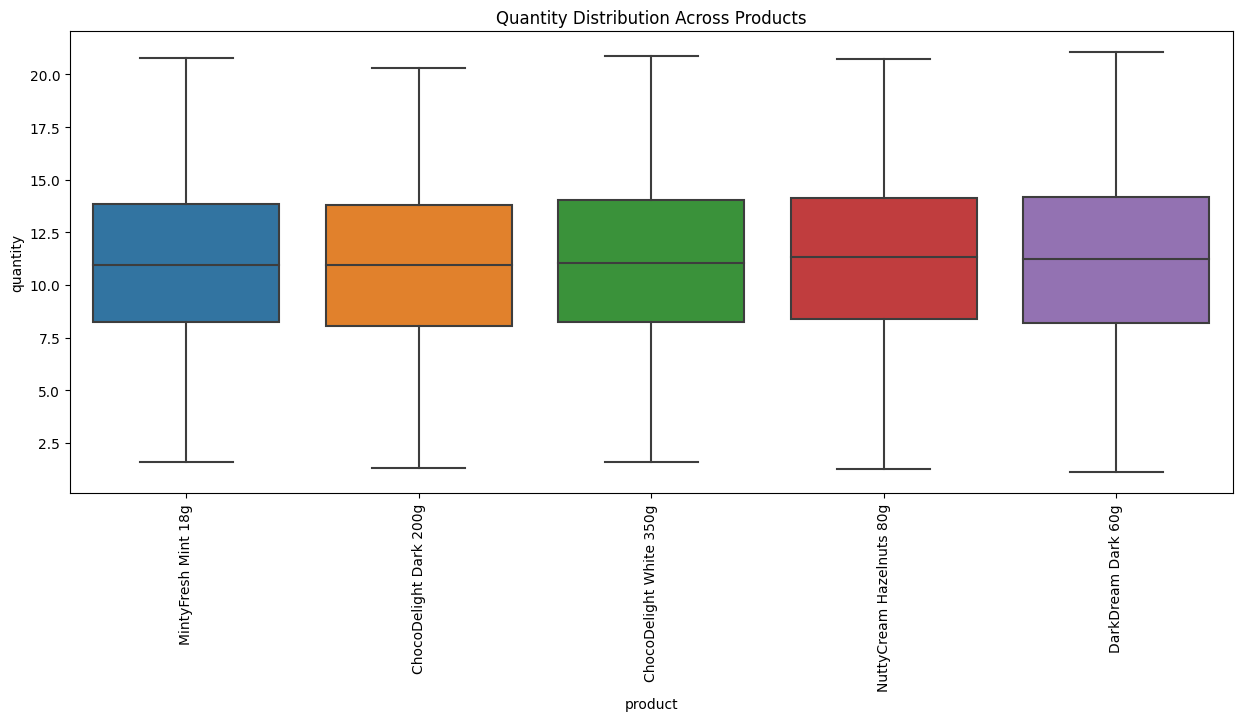

In [44]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='product', y='quantity')
plt.xticks(rotation=90)
plt.title('Quantity Distribution Across Products')
plt.show()